In [15]:
# import data
import os 
import struct
import numpy as np

In [35]:
def load_mnist(path,kind='train'):
    """Load MNIst data from `path`"""
    labels_path = os.path.join(path,'%s-labels-idx1-ubyte' % kind)
    images_path = os.path.join(path,'%s-images-idx3-ubyte' % kind)
    
    with open(labels_path,'rb') as lbpath:
        magic,n = struct.unpack('>II',lbpath.read(8))
        labels = np.fromfile(lbpath,dtype=np.uint8)
        
    with open(images_path,'rb') as imagpath:
        magic,num, rows, cols = struct.unpack(">IIII",imagpath.read(16))
        images = np.fromfile(imagpath,dtype=np.uint8).reshape(len(labels), 784)
        images = ((images/ 255.) - .5) * 2
        
        return images, labels

In [39]:
X_train, y_train = load_mnist('MNIST_DATA',kind='train')
X_test,y_test = load_mnist('MNIST_DATA',kind='t10k')

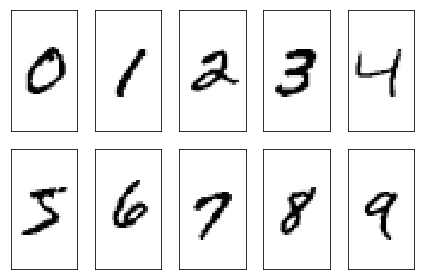

In [43]:
# visualize the data
import matplotlib.pyplot as plt
fig,ax = plt.subplots(nrows=2,ncols=5,sharex=True,sharey = True)
ax = ax.flatten()
for i in range(10):
    img = X_train[y_train==i][0].reshape(28,28)
    ax[i].imshow(img,cmap='Greys')
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

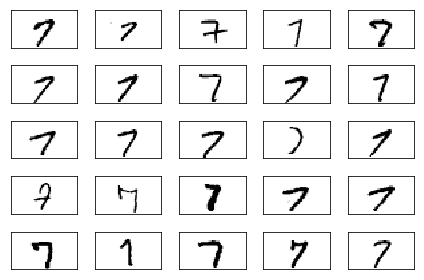

In [45]:
fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()
for i in range(25):
    img = X_train[y_train == 7][i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()


In [46]:
# save np array using savez
np.savez_compressed('mnist_scaled.npz',X_train=X_train,y_train = y_train, X_test = X_test, y_test = y_test)

In [47]:
# load from .npz
mnist = np.load('mnist_scaled.npz')